<a href="https://colab.research.google.com/github/inokchoi/AIStudy/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Google Drive Mount**

- Google Server에서 이용되는 만큼 데이터 또한 Google Drive에 있어야 함
- 아래 code를 통해 이 ipynb 파일과 Google Drive를 연결하며 읽기/쓰기 권한을 획득

In [ ]:
from google.colab import auth
from google.colab import drive

auth.authenticate_user()
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Library**




In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
import numpy as np

**Data Loading & Setting**




In [ ]:
dir = './gdrive/My Drive/Colab Notebooks/19-2 smart/'

trainData = np.genfromtxt(dir+'oil_data_train.csv',delimiter=',', skip_header=1)
X_train = trainData[:,:-1]
y_train = trainData[:,-1]

In [ ]:
testData = np.genfromtxt(dir+'oil_data_test.csv',delimiter=',', skip_header=1)
X_test = testData[:,:-1]
y_test = testData[:,-1]

In [ ]:
print(y_test)

[33.12564808 33.18517007 33.14841714 33.16748817 33.27521884 33.2868205
 33.25618092 33.23563861 33.28749909 33.25026008 33.25558584 33.25524472
 33.26320336 33.26132084 34.34016855 34.34116348 34.33593684 34.32015319
 34.32630024 34.31784701 34.31953548 34.32001033 34.31382669 34.29846157
 34.30302689 34.31515278 34.29582383 34.29310562 34.2945379  34.31341624
 34.29019825 34.31003079 34.30582277 33.92778203 33.24193609 33.24217997
 33.24856652 33.23857257 33.20253796 33.27234422 33.25468205 33.26576662
 33.27012756 33.2510887  33.23071716 33.27014609 33.25547924 33.23990303
 33.22961067 33.21721396]


**Initial Model Declaration**




In [ ]:
ridge_alpha = 1
lasso_alpha = 0.1

linear = LinearRegression()
ridge = Ridge(alpha = ridge_alpha)
lasso = Lasso(alpha = lasso_alpha)

**Training Model**




In [ ]:
linear.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

**Prediction**




In [ ]:
linear_y_hat = linear.predict(X_test)
ridge_y_hat = ridge.predict(X_test)
lasso_y_hat = lasso.predict(X_test)

linear_r2, ridge_r2, lasso_r2 = r2_score(y_test,linear_y_hat), r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
linear_MSE, ridge_MSE, lasso_MSE = mean_squared_error(y_test,linear_y_hat), mean_squared_error(y_test,ridge_y_hat), mean_squared_error(y_test,lasso_y_hat)
linear_MAE, ridge_MAE, lasso_MAE = mean_absolute_error(y_test,linear_y_hat), mean_absolute_error(y_test,ridge_y_hat), mean_absolute_error(y_test,lasso_y_hat)

print('R2 score - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_r2, ridge_r2, lasso_r2))
print('MSE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MSE, ridge_MSE, lasso_MSE))
print('MAE - Linear: %.2f, Ridge: %.2f, Lasso: %.2f' %(linear_MAE, ridge_MAE, lasso_MAE))

R2 score - Linear: 0.61, Ridge: 0.69, Lasso: 0.60
MSE - Linear: 0.11, Ridge: 0.08, Lasso: 0.11
MAE - Linear: 0.18, Ridge: 0.14, Lasso: 0.26


**Plotting Predicted Y Values**




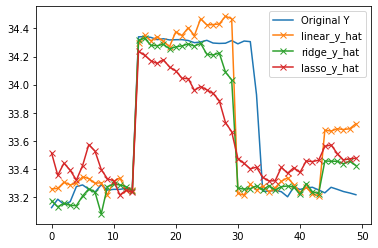

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(y_test)), y_test, '-', label="Original Y")
ax.plot(range(len(y_test)), linear_y_hat, '-x', label="linear_y_hat")
ax.plot(range(len(y_test)), ridge_y_hat, '-x', label="ridge_y_hat")
ax.plot(range(len(y_test)), lasso_y_hat, '-x', label="lasso_y_hat")
plt.legend(loc='upper right')
plt.show()

In [ ]:
ridge_result = []
lasso_result = []
alpha = [0.001,0.01,0.1,1,10]

for a in alpha:
  ridge = Ridge(alpha = a)
  lasso = Lasso(alpha = a)

  ridge.fit(X_train,y_train)
  lasso.fit(X_train,y_train)

  ridge_y_hat = ridge.predict(X_test)
  lasso_y_hat = lasso.predict(X_test)

  ridge_r2, lasso_r2 = r2_score(y_test,ridge_y_hat), r2_score(y_test,lasso_y_hat)
  ridge_result.append(ridge_r2)
  lasso_result.append(lasso_r2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15977488986227362, tolerance: 0.0027677457287885
  positive)


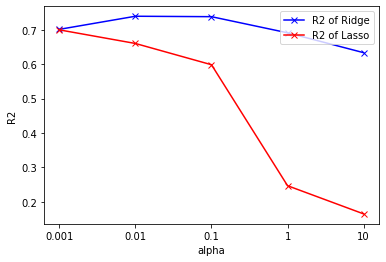

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(5), ridge_result, '-x', c='blue', label="R2 of Ridge")
ax.plot(range(5), lasso_result, '-x', c='red', label="R2 of Lasso")
plt.xticks(range(5), alpha)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.legend(loc='upper right')
plt.show()